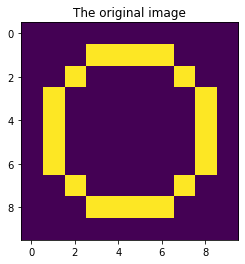

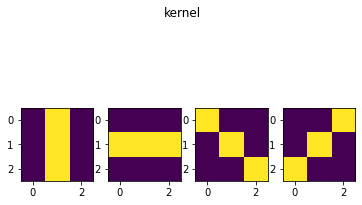

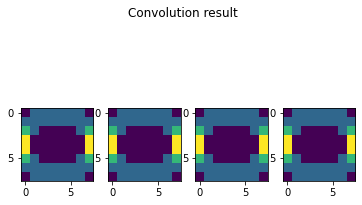

In [3]:
# 가로, 세로, 대각선 검출
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 아주 간단한 합성곱층 정의
class Conv:
    #간단한 예이기 때문에 W는 3 x 3으로 고정하고 이후 절에서 다룰 strides나 padding은 고려하지 않음
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                #각 요소 별 곱의 합계 취하기
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

#커널 적절하게 설정하기
W1 = np.array([[0, 1, 0],
              [0, 1, 0],
              [0, 1, 0]])

W2 = np.array([[0, 0, 0],
              [1, 1, 1],
              [0, 0, 0]])

W3 = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])


W4 = np.array([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0]])

plt.subplot(1, 4, 1); plt.imshow(W1)
plt.subplot(1, 4, 2); plt.imshow(W2)
plt.subplot(1, 4, 3); plt.imshow(W3)
plt.subplot(1, 4, 4); plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

#합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv1.f_prop(X)
conv3 = Conv(W3); C3 = conv1.f_prop(X)
conv4 = Conv(W4); C4 = conv1.f_prop(X)

plt.subplot(1, 4, 1); plt.imshow(C1)
plt.subplot(1, 4, 2); plt.imshow(C2)
plt.subplot(1, 4, 3); plt.imshow(C3)
plt.subplot(1, 4, 4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

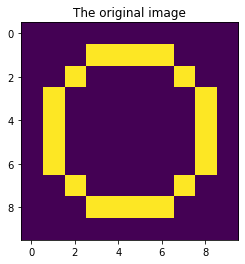

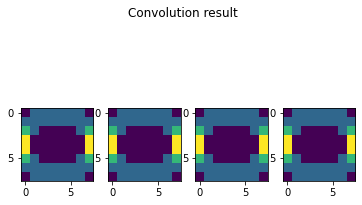

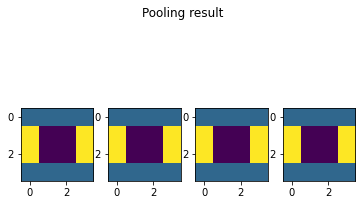

In [2]:
# 폴링층

import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 아주 간단한 합성곱층 정의
class Conv:
    #간단한 예이기 때문에 X는 3 x 3으로 고정하고 이후 절에서 다룰 strides나 padding은 고려하지 않음
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out

#아주 간단한 풀링층 정의
class Pool:
    #간단한 예이기 때문에 이후 절에서 다룰 strides나 padding은 고려하지 않음
    def __init__(self, l):
        self.l = l
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i, j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out
    
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)
plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

#커널
W1 = np.array([[0, 1, 0],
              [0, 1, 0],
              [0, 1, 0]])

W2 = np.array([[0, 0, 0],
              [1, 1, 1],
              [0, 0, 0]])

W3 = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

W4 = np.array([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0]])

#합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W1); C2 = conv2.f_prop(X)
conv3 = Conv(W1); C3 = conv3.f_prop(X)
conv4 = Conv(W1); C4 = conv4.f_prop(X)

plt.subplot(1, 4, 1); plt.imshow(C1)
plt.subplot(1, 4, 2); plt.imshow(C2)
plt.subplot(1, 4, 3); plt.imshow(C3)
plt.subplot(1, 4, 4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

#풀링
pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1, 4, 1); plt.imshow(P1)
plt.subplot(1, 4, 2); plt.imshow(P2)
plt.subplot(1, 4, 3); plt.imshow(P3)
plt.subplot(1, 4, 4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

In [4]:
#CNN 구현하기
from tensorflow.keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

#모델 정의
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1),
                filters=32,
                kernel_size=(2, 2),
                strides=(1, 1),
                padding="same"))

model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(1, 1)))
model.add(Conv2D(filters=32,
                kernel_size=(2, 2),
                strides=(1, 1),
                padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               5538048   
_________________________________________________________________
activation (Activation)      (None, 256)               0

4/4 [==============================] - 0s 11ms/step - loss: 7.5146 - accuracy: 0.1100
Test loss:  7.514636039733887
Test accuracy:  0.10999999940395355


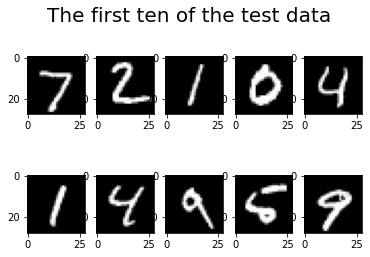

[6 6 6 6 6 7 6 6 6 6]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (No

In [7]:
# CNN을 이용한 분류(MNIST)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 전체 데이터 중 학습에 300장, 테스트에 100장의 데이터 사용
# Conv 층은 4차원 배열을 받아들임(배티 크기 x 가로 x 세로 x 채널 수)
# MNIST 데이터는 RGB 이미지가 아니라 원래 3차원 데이터이므로 미리 4차원으로 변환
X_train = X_train[:300].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

#모델 정의하기
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_test, y_test))

#정확도 평가
scores=model.evaluate(X_test, y_test, verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

#데이터 시각화하기(테스트 데이터의 처음 10장)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), 'gray')
plt.suptitle("The first ten of the test data", fontsize=20)
plt.show()

#에측하기(테스트 데이터의 처음 10장)
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()